# 01a - High-level Exploration of the Training Dataset

The notebook contains:
* general statistics of the dataset,
* visualization of class distribution of the training dataset with 380k images and a mini-subset with 70k images,
* image examples in the training and validation datasets.

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.core import data
from src.utils import visualization as viz


def plot_class_distribution(df, *, title=None, ax=None):
    assert 'valid' in df
    assert 'binomial' in df

    if ax is None:
        fig, ax = viz.create_fig(ncols=1, nrows=1)

    df.loc[~df['valid'], 'binomial'].value_counts().plot(kind='area', label='Training Set', ax=ax)
    df.loc[df['valid'], 'binomial'].value_counts().plot(kind='area', label='Validation Set', ax=ax)
    ax.set(xticks=[], xlabel='Snake Species (classes)', ylabel='Image Counts', title=title)
    ax.legend()

    return ax


DATA_DIR = 'data/snake_clef2021_dataset/'
TRAIN_SET_DIR = 'train'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load metadata
train_df = pd.read_csv(DATA_DIR + 'SnakeCLEF2021_train_metadata_PROD.csv')
mini_train_df = pd.read_csv(DATA_DIR + 'SnakeCLEF2021_min-train_metadata_PROD.csv')

# define validation split
train_df['valid'] = train_df['subset'] == 'val'
mini_train_df = data.get_valid_col(mini_train_df, 'binomial', 'valid', valid_pct=0.2)

## General Statistics

**Number of samples in the full dataset:**

In [5]:
train_df['source'].value_counts().sum()

386006

**Number of samples in the mini-subset:**

In [6]:
mini_train_df['source'].value_counts().sum()

70208

**Number of countries:**

In [7]:
len(train_df['country'].drop_duplicates())

188

**Geographical regions:**

In [8]:
train_df['continent'].value_counts()

North America    276135
unknown           51061
Europe            18689
Asia              16518
South America     12735
Africa             6017
Australia          4313
Oceania             538
Name: continent, dtype: int64

**Data sources from which the dataset is made of:**

In [9]:
train_df['source'].value_counts()

inaturalist    277025
herpmapper      58351
flickr          50630
Name: source, dtype: int64

**Data sources in geographical regions:**

In [10]:
train_df.groupby(['source', 'continent']).size()

source       continent    
flickr       Africa              389
             Asia               1502
             Australia           727
             Europe             1964
             North America      3147
             South America       656
             unknown           42245
herpmapper   Africa              401
             Asia               2173
             Europe              300
             North America     54342
             Oceania             538
             South America       596
             unknown               1
inaturalist  Africa             5227
             Asia              12843
             Australia          3586
             Europe            16425
             North America    218646
             South America     11483
             unknown            8815
dtype: int64

**Data sources with training validation split:**

In [11]:
train_df.groupby(['source', 'subset']).size()

source       subset
flickr       train      45639
             val         4991
herpmapper   train      52410
             val         5941
inaturalist  train     249356
             val        27669
dtype: int64

**List of countries with number of species with up to 30 samples:**

In [12]:
counts = train_df['binomial'].value_counts()
cond = train_df['binomial'].isin(counts[counts < 30].index)
train_df.loc[cond, 'country'].value_counts()

unknown         618
Mexico          311
Colombia         83
South Africa     68
Australia        55
               ... 
Zambia            1
Mozambique        1
Mongolia          1
Germany           1
Kazakhstan        1
Name: country, Length: 72, dtype: int64

**List of countries with number of species with at least 10,000 samples:**

In [13]:
counts = train_df['binomial'].value_counts()
cond = train_df['binomial'].isin(counts[counts >= 10_000].index)
train_df.loc[cond, 'country'].value_counts()

United States of America    78119
Canada                       6356
unknown                      3171
Mexico                       1086
Germany                         5
Netherlands                     3
Spain                           3
Honduras                        2
Belgium                         2
Singapore                       2
United Kingdom                  2
Sri Lanka                       1
Name: country, dtype: int64

## Class Distribution in Mini-subset (70k images)

The dataset is splitted into Training set 80% and Validation set 20%.

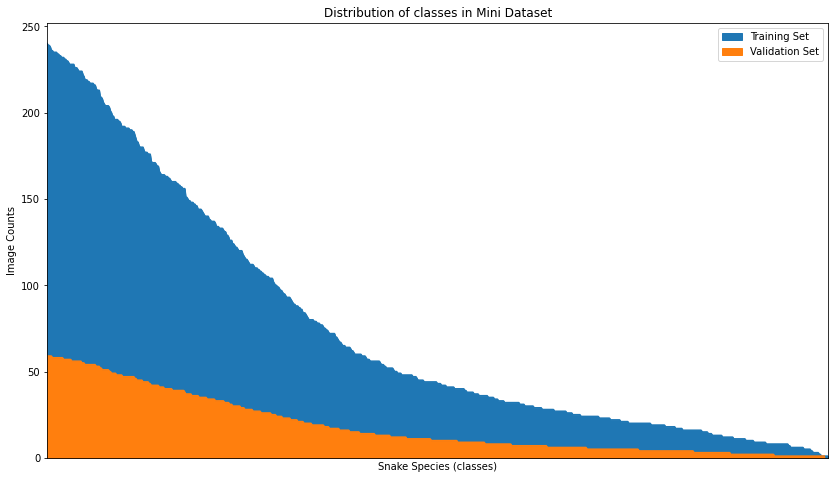

In [14]:
fig, ax = viz.create_fig(ncols=1, nrows=1, colsize=14, rowsize=8)
plot_class_distribution(mini_train_df, title='Distribution of classes in Mini Dataset', ax=ax)
plt.show()

## Class Distribution in Full dataset (380k images)

The dataset is splitted into Training set 90% and Validation set 10%.

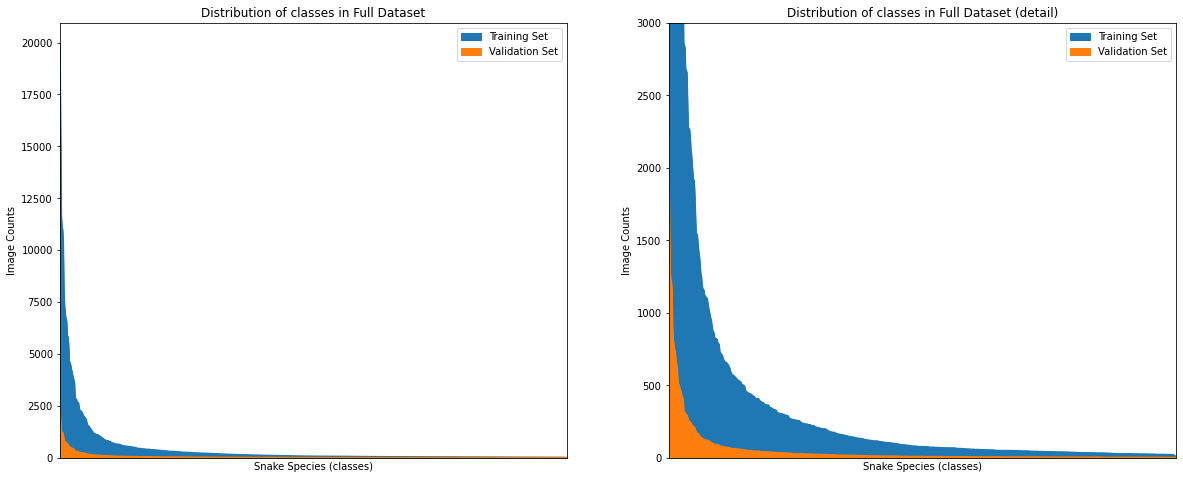

In [15]:
fig, (ax1, ax2) = viz.create_fig(ncols=2, nrows=1, colsize=10, rowsize=8)
plot_class_distribution(
    train_df, title='Distribution of classes in Full Dataset', ax=ax1)
plot_class_distribution(
    train_df, title='Distribution of classes in Full Dataset (detail)', ax=ax2)
ax2.set(ylim=[0, 3000])
plt.show()

## Show Image Examples

In [16]:
from fastai.vision.all import Resize, ToTensor

# create image data loaders
dls, dblock = data.create_dls(
    train_df, path=DATA_DIR, folder=TRAIN_SET_DIR,
    fn_col='image_path', label_col='binomial', valid_col='valid',
    item_tfms=[ToTensor, Resize(224)])

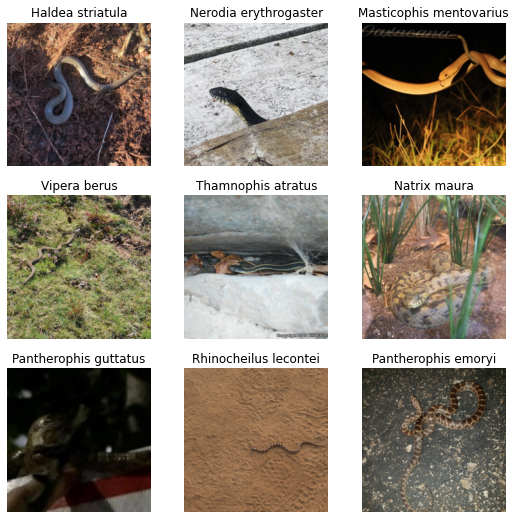

In [17]:
dls.train.show_batch()

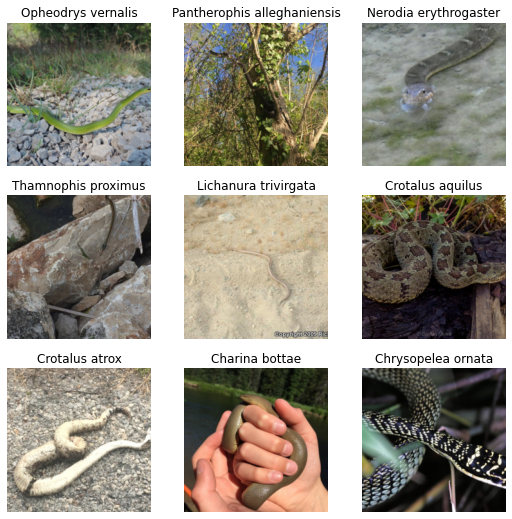

In [18]:
dls.valid.show_batch()